In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Face')

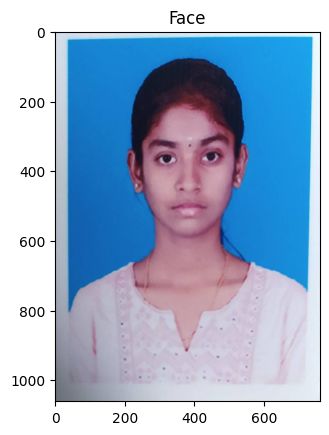

In [2]:
faceImage = cv2.imread('photo.JPG')
plt.imshow(faceImage[:,:,::-1]);plt.title("Face")

In [3]:
faceImage.shape

(1061, 760, 3)

In [4]:
faceImage.shape

(1061, 760, 3)

Text(0.5, 1.0, 'glassPNG')

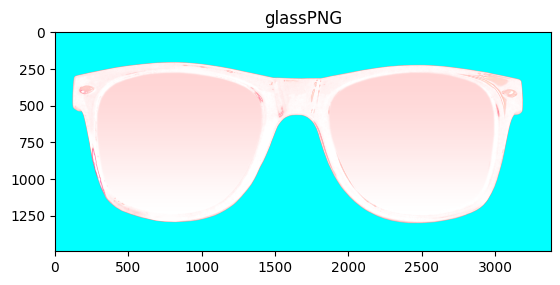

In [5]:
glassPNG = cv2.imread('photog.png',-1)
plt.imshow(glassPNG[:,:,::-1]);plt.title("glassPNG")

In [42]:
glassPNG = cv2.resize(glassPNG,(310,150))
print("image Dimension ={}".format(glassPNG.shape))

image Dimension =(150, 310, 4)


In [43]:
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

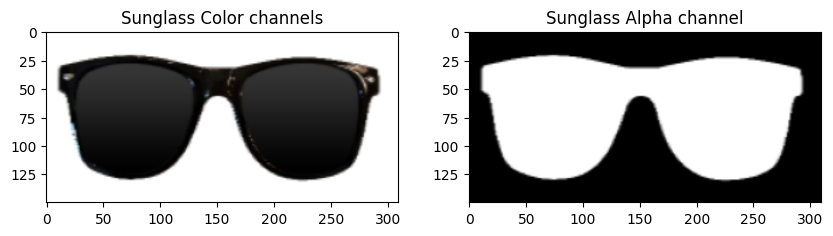

In [44]:
plt.figure(figsize=[10,10])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

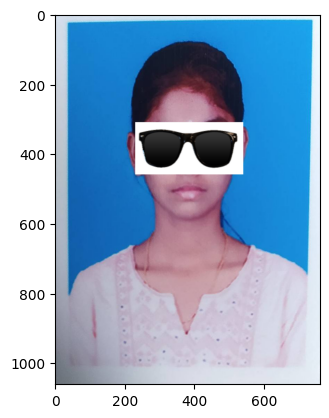

In [45]:
faceWithGlassesNaive = faceImage.copy()
faceWithGlassesNaive[310:460, 230:540]=glassBGR
plt.imshow(faceWithGlassesNaive[...,::-1])

In [50]:
glassMask = cv2.merge((glassMask1,glassMask1,glassMask1))
glassMask = np.uint8(glassMask/255)

In [51]:
faceWithGlassesArithmetic = faceImage.copy()
eyeROI= faceWithGlassesArithmetic[310:460, 230:540]
maskedEye = cv2.multiply(eyeROI,(1-  glassMask ))

In [52]:
maskedGlass = cv2.multiply(glassBGR,glassMask)
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)



Text(0.5, 1.0, 'Augmented Eye and Sunglass')

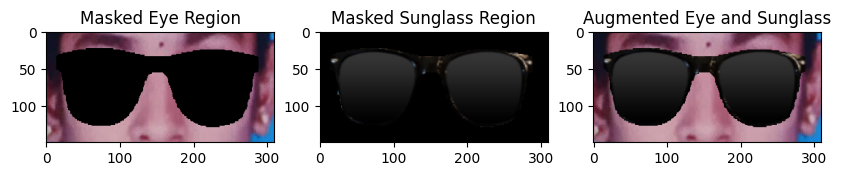

In [53]:
plt.figure(figsize=[10,10])
plt.subplot(131);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(132);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(133);plt.imshow(eyeRoiFinal[...,::-1]);plt.title("Augmented Eye and Sunglass")


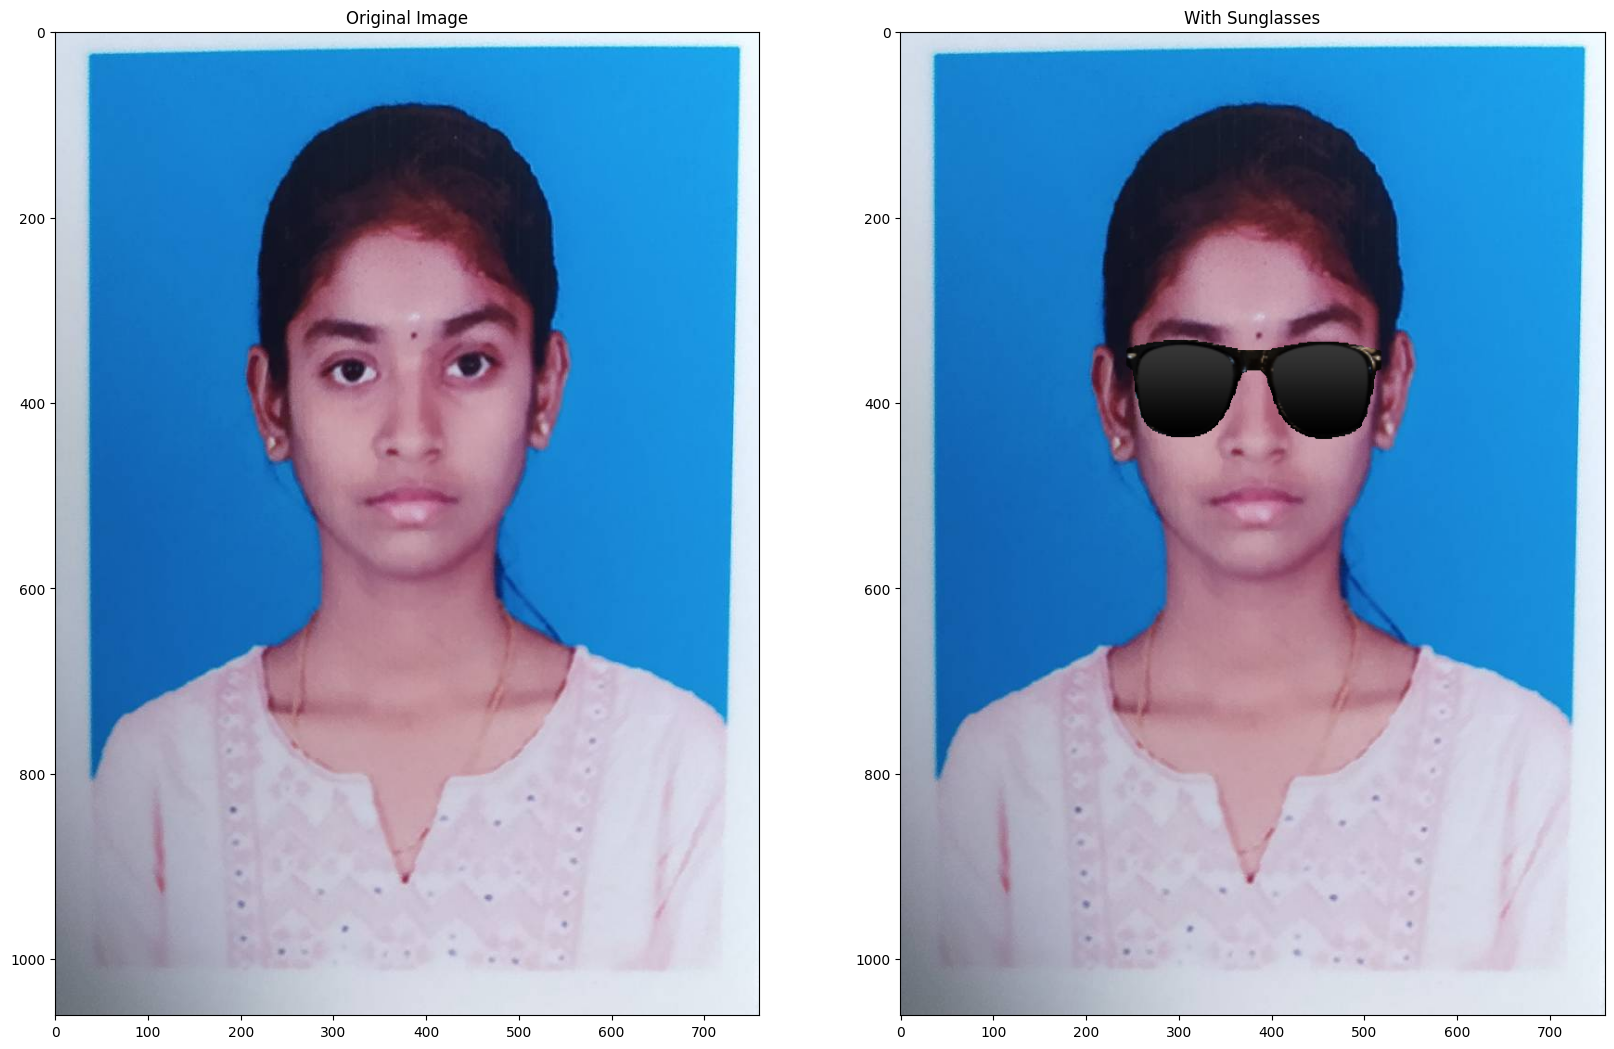

In [54]:
faceWithGlassesArithmetic[310:460, 230:540]=eyeRoiFinal
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglasses");